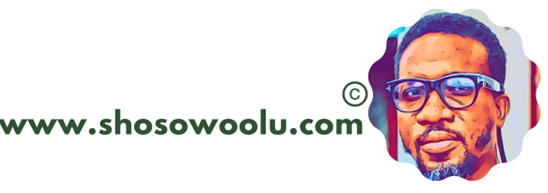

# Pandas Documentation Example Walkthrough Notebook

## Introduction

This notebook is the walkalong from the reading of the Pandas Documentation.

It is used to test/practice all the examples presented in the documentation. 



In [199]:
# Display multiple output in the notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 10 mins to Pandas

In [1]:
import numpy as np
import pandas as pd

**Basic data structures in Pandas**

In [2]:
# Series
# Pandas creates a default `RangeIndex`
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
# DataFrame
# Create a DataFrame by passing a NumPy array with a datetime index using `date_range() and labelled columns
dates = pd.date_range('20230101', periods=6)
dates

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2023-01-01,-0.851694,-1.224243,0.557810,0.132576
2023-01-02,0.503463,0.194520,-1.050618,-0.237443
2023-01-03,0.706557,1.552802,-1.315964,1.059450
2023-01-04,-0.913775,0.472987,0.002132,1.256296
2023-01-05,-0.702187,-0.078035,-1.227598,0.599270
2023-01-06,-0.915656,2.081768,0.568507,0.886593


In [5]:
# Create a DataFrame by passing a dictionary of objects where the keys are the column labels and values are column values
df2 = pd.DataFrame(
        {'A': 1.0,
         'B': pd.Timestamp('20230102'),
         'C': pd.Series(1, index=list(range(4)),dtype='float32'),
         'D': np.array([3] * 4, dtype='int32'),
         'E': pd.Categorical(['test', 'train', 'test', 'train']),
         'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2023-01-02,1.0,3,test,foo
1,1.0,2023-01-02,1.0,3,train,foo
2,1.0,2023-01-02,1.0,3,test,foo
3,1.0,2023-01-02,1.0,3,train,foo


In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [7]:
# Veiw the top of the data
df2.head()

,A,B,C,D,E,F
0,1.0,2023-01-02,1.0,3,test,foo
1,1.0,2023-01-02,1.0,3,train,foo
2,1.0,2023-01-02,1.0,3,test,foo
3,1.0,2023-01-02,1.0,3,train,foo


In [8]:
# Veiw the bottom row of the data
df2.tail(2)

,A,B,C,D,E,F
2,1.0,2023-01-02,1.0,3,test,foo
3,1.0,2023-01-02,1.0,3,train,foo


In [9]:
# Display the index
df.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
# Display the columns
df.columns


Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
# Return the underlining NumPy data
# Pandas will find the NumPy dtype that can hold all the dtypes in the DataFrame.
df2.to_numpy()

array([[1.0, Timestamp('2023-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2023-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2023-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2023-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [12]:
# Quick statistics of data
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.362215,0.499967,-0.410955,0.616124
std,0.755957,1.184193,0.890349,0.573095
min,-0.915656,-1.224243,-1.315964,-0.237443
25%,-0.898255,-0.009896,-1.183353,0.249250
50%,-0.776941,0.333754,-0.524243,0.742932
75%,0.202050,1.282848,0.418891,1.016236
max,0.706557,2.081768,0.568507,1.256296


In [13]:
# Transpose the data
df.T

,2023-01-01,2023-01-02,2023-01-03,2023-01-04,2023-01-05,2023-01-06
A,-0.851694,0.503463,0.706557,-0.913775,-0.702187,-0.915656
B,-1.224243,0.194520,1.552802,0.472987,-0.078035,2.081768
C,0.557810,-1.050618,-1.315964,0.002132,-1.227598,0.568507
D,0.132576,-0.237443,1.059450,1.256296,0.599270,0.886593


In [14]:
# Sort by axis (column - axis)
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2023-01-01,0.132576,0.557810,-1.224243,-0.851694
2023-01-02,-0.237443,-1.050618,0.194520,0.503463
2023-01-03,1.059450,-1.315964,1.552802,0.706557
2023-01-04,1.256296,0.002132,0.472987,-0.913775
2023-01-05,0.599270,-1.227598,-0.078035,-0.702187
2023-01-06,0.886593,0.568507,2.081768,-0.915656


In [15]:
# Sort by Index (row - axis)
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2023-01-06,-0.915656,2.081768,0.568507,0.886593
2023-01-05,-0.702187,-0.078035,-1.227598,0.599270
2023-01-04,-0.913775,0.472987,0.002132,1.256296
2023-01-03,0.706557,1.552802,-1.315964,1.059450
2023-01-02,0.503463,0.194520,-1.050618,-0.237443
2023-01-01,-0.851694,-1.224243,0.557810,0.132576


In [16]:
# Sort values
df.sort_values(by='B', ascending=False)

,A,B,C,D
2023-01-06,-0.915656,2.081768,0.568507,0.886593
2023-01-03,0.706557,1.552802,-1.315964,1.059450
2023-01-04,-0.913775,0.472987,0.002132,1.256296
2023-01-02,0.503463,0.194520,-1.050618,-0.237443
2023-01-05,-0.702187,-0.078035,-1.227598,0.599270
2023-01-01,-0.851694,-1.224243,0.557810,0.132576


**Selection**

The optimised Pandas data access methods are `Dataframe.at()`, `DataFrame.iat()`, `DataFrame.loc`, `DataFrame.iloc`

In [17]:
# For a DataFrame passing a single label selects a column and yields a 'Series'. Same as df.A (no space allowed in column name)
df['A']

2023-01-01   -0.851694
2023-01-02    0.503463
2023-01-03    0.706557
2023-01-04   -0.913775
2023-01-05   -0.702187
2023-01-06   -0.915656
Freq: D, Name: A, dtype: float64

In [18]:
df.A

2023-01-01   -0.851694
2023-01-02    0.503463
2023-01-03    0.706557
2023-01-04   -0.913775
2023-01-05   -0.702187
2023-01-06   -0.915656
Freq: D, Name: A, dtype: float64

In [19]:
# for a DataFrame, passing a slice `:` selects matching rows
df[0:3]

,A,B,C,D
2023-01-01,-0.851694,-1.224243,0.557810,0.132576
2023-01-02,0.503463,0.194520,-1.050618,-0.237443
2023-01-03,0.706557,1.552802,-1.315964,1.059450


In [20]:
# Selecting by row labels
df['20230102':'20230104']

,A,B,C,D
2023-01-02,0.503463,0.194520,-1.050618,-0.237443
2023-01-03,0.706557,1.552802,-1.315964,1.059450
2023-01-04,-0.913775,0.472987,0.002132,1.256296


In [21]:
# Selecting a row matching a label 
df.loc[dates[0]]

A   -0.851694
B   -1.224243
C    0.557810
D    0.132576
Name: 2023-01-01 00:00:00, dtype: float64

In [22]:
# Select all rows with a select column labels
df.loc[ :,['A', 'C']]

,A,C
2023-01-01,-0.851694,0.557810
2023-01-02,0.503463,-1.050618
2023-01-03,0.706557,-1.315964
2023-01-04,-0.913775,0.002132
2023-01-05,-0.702187,-1.227598
2023-01-06,-0.915656,0.568507


In [23]:
# For label slicing, both endpoint are included.
df.loc['20230101':'20230104', ['A','B', "C"]]

,A,B,C
2023-01-01,-0.851694,-1.224243,0.557810
2023-01-02,0.503463,0.194520,-1.050618
2023-01-03,0.706557,1.552802,-1.315964
2023-01-04,-0.913775,0.472987,0.002132


In [24]:
# Selecting a single row and column returns a scalar
df.loc[dates[0], "A"]

-0.8516944189001304

In [25]:
# For getting faster access to scalar like above
df.at[dates[0], 'A']

-0.8516944189001304

In [26]:
# Selection by position 
df.iloc[3] #4th row


A   -0.913775
B    0.472987
C    0.002132
D    1.256296
Name: 2023-01-04 00:00:00, dtype: float64

In [27]:
# Interger slices similar to NumPy/Python
df.iloc[3:5, 0:3]

,A,B,C
2023-01-04,-0.913775,0.472987,0.002132
2023-01-05,-0.702187,-0.078035,-1.227598


In [28]:
# Lists of integer position locations
df.iloc[[1,2,4], [0,2]]

,A,C
2023-01-02,0.503463,-1.050618
2023-01-03,0.706557,-1.315964
2023-01-05,-0.702187,-1.227598


In [29]:
# Column slicing explicitly
df.iloc[:, 1:3]

,B,C
2023-01-01,-1.224243,0.557810
2023-01-02,0.194520,-1.050618
2023-01-03,1.552802,-1.315964
2023-01-04,0.472987,0.002132
2023-01-05,-0.078035,-1.227598
2023-01-06,2.081768,0.568507


In [30]:
# Getting a value explicitly
df.iloc[1, 1]

0.1945202695476497

In [31]:
# Get a fast access to a value explicitly (similar outcome to above)
df.iat[1, 1]

0.1945202695476497

**Boolean Indexing**

In [32]:
# Select rows where df.A is greater than 0
df[df['A'] > 0]

,A,B,C,D
2023-01-02,0.503463,0.194520,-1.050618,-0.237443
2023-01-03,0.706557,1.552802,-1.315964,1.059450


In [33]:
# Select values from DataFrame where a boolean condition is met
df[df > 0]

,A,B,C,D
2023-01-01,NaN,NaN,0.557810,0.132576
2023-01-02,0.503463,0.194520,NaN,NaN
2023-01-03,0.706557,1.552802,NaN,1.059450
2023-01-04,NaN,0.472987,0.002132,1.256296
2023-01-05,NaN,NaN,NaN,0.599270
2023-01-06,NaN,2.081768,0.568507,0.886593


In [34]:
# Using `isin` method for filtering
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2023-01-01,-0.851694,-1.224243,0.557810,0.132576,one
2023-01-02,0.503463,0.194520,-1.050618,-0.237443,one
2023-01-03,0.706557,1.552802,-1.315964,1.059450,two
2023-01-04,-0.913775,0.472987,0.002132,1.256296,three
2023-01-05,-0.702187,-0.078035,-1.227598,0.599270,four
2023-01-06,-0.915656,2.081768,0.568507,0.886593,three


In [35]:
# The boolean filter
df2['E'].isin(['two', 'four'])

2023-01-01    False
2023-01-02    False
2023-01-03     True
2023-01-04    False
2023-01-05     True
2023-01-06    False
Freq: D, Name: E, dtype: bool

In [36]:
# Applying the boolean filter
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2023-01-03,0.706557,1.552802,-1.315964,1.05945,two
2023-01-05,-0.702187,-0.078035,-1.227598,0.59927,four


**Setting**

In [48]:
# Setting a new column automatically aligns the data by indexes
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20230102', periods=6))
s1

2023-01-02    1
2023-01-03    2
2023-01-04    3
2023-01-05    4
2023-01-06    5
2023-01-07    6
Freq: D, dtype: int64

In [49]:
df['F'] = s1

In [50]:
# Setting values by label
df.at[dates[0], 'A'] = 0

In [51]:
# Setting values by position
df.iat[0,1] = 0

In [52]:
# Setting value by assigning with a NumPy array
df.loc[:, 'D'] = np.array([5] * len(df))

In [53]:
df

,A,B,C,D,F,G
2023-01-01,0.000000,0.000000,0.557810,5,NaN,1
2023-01-02,0.503463,0.194520,-1.050618,5,1.0,2
2023-01-03,0.706557,1.552802,-1.315964,5,2.0,3
2023-01-04,-0.913775,0.472987,0.002132,5,3.0,4
2023-01-05,-0.702187,-0.078035,-1.227598,5,4.0,5
2023-01-06,-0.915656,2.081768,0.568507,5,5.0,6


In [45]:
# A `where` operation with setting
df2 = df.copy()
df2[df2 > 0] = -df2 #boolean where type filter to set value
df2

,A,B,C,D,F,G
2023-01-01,0.000000,0.000000,-0.557810,-5,NaN,NaN
2023-01-02,-0.503463,-0.194520,-1.050618,-5,NaN,NaN
2023-01-03,-0.706557,-1.552802,-1.315964,-5,NaN,NaN
2023-01-04,-0.913775,-0.472987,-0.002132,-5,NaN,NaN
2023-01-05,-0.702187,-0.078035,-1.227598,-5,NaN,NaN
2023-01-06,-0.915656,-2.081768,-0.568507,-5,NaN,NaN


**Missing Data**

`np.nan` represents missing data in NumPy data type and by default not included in computations

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data

In [56]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) +['E'])

In [57]:
df1.loc[dates[0] : dates[1], 'E'] = 1
df1

,A,B,C,D,F,G,E
2023-01-01,0.000000,0.000000,0.557810,5,NaN,1,1.0
2023-01-02,0.503463,0.194520,-1.050618,5,1.0,2,1.0
2023-01-03,0.706557,1.552802,-1.315964,5,2.0,3,NaN
2023-01-04,-0.913775,0.472987,0.002132,5,3.0,4,NaN


In [58]:
# `DataFrame.dropna()` drops any rows that have missing data
df1.dropna(how='any') # not inplace

,A,B,C,D,F,G,E
2023-01-02,0.503463,0.19452,-1.050618,5,1.0,2,1.0


In [59]:
df1 # the original DataFrame is unchanged

,A,B,C,D,F,G,E
2023-01-01,0.000000,0.000000,0.557810,5,NaN,1,1.0
2023-01-02,0.503463,0.194520,-1.050618,5,1.0,2,1.0
2023-01-03,0.706557,1.552802,-1.315964,5,2.0,3,NaN
2023-01-04,-0.913775,0.472987,0.002132,5,3.0,4,NaN


In [61]:
# `DataFrame.fillna()` fills missing data
df1.fillna(value=5) # not inplace 

,A,B,C,D,F,G,E
2023-01-01,0.000000,0.000000,0.557810,5,5.0,1,1.0
2023-01-02,0.503463,0.194520,-1.050618,5,1.0,2,1.0
2023-01-03,0.706557,1.552802,-1.315964,5,2.0,3,5.0
2023-01-04,-0.913775,0.472987,0.002132,5,3.0,4,5.0


In [62]:
df1 # original df remains unchanged

,A,B,C,D,F,G,E
2023-01-01,0.000000,0.000000,0.557810,5,NaN,1,1.0
2023-01-02,0.503463,0.194520,-1.050618,5,1.0,2,1.0
2023-01-03,0.706557,1.552802,-1.315964,5,2.0,3,NaN
2023-01-04,-0.913775,0.472987,0.002132,5,3.0,4,NaN


In [63]:
# `isna()` gets the boolean mask where values are `nan`
pd.isna(df1)

,A,B,C,D,F,G,E
2023-01-01,False,False,False,False,True,False,False
2023-01-02,False,False,False,False,False,False,False
2023-01-03,False,False,False,False,False,False,True
2023-01-04,False,False,False,False,False,False,True


In [64]:
# Carry out the inplace operations
df3 = df1.copy()
df4 = df1.copy()
df3.dropna(how='any', inplace=True)
df4.fillna(value=5, inplace=True)

In [66]:
df3

,A,B,C,D,F,G,E
2023-01-02,0.503463,0.19452,-1.050618,5,1.0,2,1.0


In [67]:
df4

,A,B,C,D,F,G,E
2023-01-01,0.000000,0.000000,0.557810,5,5.0,1,1.0
2023-01-02,0.503463,0.194520,-1.050618,5,1.0,2,1.0
2023-01-03,0.706557,1.552802,-1.315964,5,2.0,3,5.0
2023-01-04,-0.913775,0.472987,0.002132,5,3.0,4,5.0


**Operations**

Operations in general ***exclude*** missing data

In [72]:
# Calculate mean for each column
df.mean() #axis=0 is default

A   -0.220266
B    0.704007
C   -0.410955
D    5.000000
F    3.000000
G    3.500000
dtype: float64

In [69]:
# Calculate the mean for each row
df.mean(axis=1)

2023-01-01    1.311562
2023-01-02    1.274561
2023-01-03    1.823899
2023-01-04    1.926891
2023-01-05    1.998697
2023-01-06    2.955770
Freq: D, dtype: float64

Operating with another `Series` or `DataFrame` with a different index or column will align the result with the union of the index or column labels. In addition, pandas automatically broadcasts along the specified dimension and will fill unaligned labels with `np.nan`

In [75]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2023-01-01    NaN
2023-01-02    NaN
2023-01-03    1.0
2023-01-04    3.0
2023-01-05    5.0
2023-01-06    NaN
Freq: D, dtype: float64

In [76]:
df

,A,B,C,D,F,G
2023-01-01,0.000000,0.000000,0.557810,5,NaN,1
2023-01-02,0.503463,0.194520,-1.050618,5,1.0,2
2023-01-03,0.706557,1.552802,-1.315964,5,2.0,3
2023-01-04,-0.913775,0.472987,0.002132,5,3.0,4
2023-01-05,-0.702187,-0.078035,-1.227598,5,4.0,5
2023-01-06,-0.915656,2.081768,0.568507,5,5.0,6


In [77]:
df.sub(s, axis='index')


,A,B,C,D,F,G
2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03,-0.293443,0.552802,-2.315964,4.0,1.0,2.0
2023-01-04,-3.913775,-2.527013,-2.997868,2.0,0.0,1.0
2023-01-05,-5.702187,-5.078035,-6.227598,0.0,-1.0,0.0
2023-01-06,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# User defined functions
# `DataFrame.agg()` and `DataFrame.Transform()` applies a user defined function that reduces or broadcast its results respectively.
df.agg(lambda x: np.mean(x) * 5.6)

A    -1.233492
B     3.942441
C    -2.301348
D    28.000000
F    16.800000
G    19.600000
dtype: float64

In [79]:
df.transform(lambda x: x * 101.2)

,A,B,C,D,F,G
2023-01-01,0.000000,0.000000,56.450403,506.0,NaN,101.2
2023-01-02,50.950452,19.685451,-106.322500,506.0,101.2,202.4
2023-01-03,71.503555,157.143575,-133.175536,506.0,202.4,303.6
2023-01-04,-92.474051,47.866301,0.215803,506.0,303.6,404.8
2023-01-05,-71.061360,-7.897095,-124.232922,506.0,404.8,506.0
2023-01-06,-92.664361,210.674959,57.532921,506.0,506.0,607.2


**Value Counts**

In [82]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    1
1    1
2    6
3    0
4    4
5    1
6    2
7    4
8    5
9    4
dtype: int32

In [83]:
s.value_counts()

1    3
4    3
6    1
0    1
2    1
5    1
dtype: int64

**String Operations**

`Series` is equipped with set of string processing methods in the `str` attribute.

In [87]:
s = pd.Series(['A', 'B', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2    Aaba
3    Baca
4     NaN
5    CABA
6     dog
7     cat
dtype: object

In [88]:
s.str.lower() # operation is not inplace automatically

0       a
1       b
2    aaba
3    baca
4     NaN
5    caba
6     dog
7     cat
dtype: object

In [89]:
s

0       A
1       B
2    Aaba
3    Baca
4     NaN
5    CABA
6     dog
7     cat
dtype: object

**Merge**

In [90]:
# Uses the set logic for the indexes and relational algebra dunctinality in the case of join/merge-type operations
# Concat() - Concatenating pandas objects together row-wise with concat()
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.200648,1.334167,0.229657,-0.915052
1,-0.267801,0.783731,1.553261,-1.465203
2,1.847857,-1.780176,-0.577831,-0.062590
3,1.908745,-0.387129,-0.237463,1.362469
4,0.661982,-0.284777,-0.035658,0.085390
5,0.621136,0.575929,0.150779,-0.547004
6,-2.454607,-0.842595,-0.196563,-0.713796
7,0.779232,0.125234,-0.169461,-0.113568
8,-1.151928,0.441838,-2.093916,-0.556522
9,0.698279,0.518850,0.190766,0.730076


In [91]:
# Break the df into piece
pieces= [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.200648  1.334167  0.229657 -0.915052
 1 -0.267801  0.783731  1.553261 -1.465203
 2  1.847857 -1.780176 -0.577831 -0.062590,
           0         1         2         3
 3  1.908745 -0.387129 -0.237463  1.362469
 4  0.661982 -0.284777 -0.035658  0.085390
 5  0.621136  0.575929  0.150779 -0.547004
 6 -2.454607 -0.842595 -0.196563 -0.713796,
           0         1         2         3
 7  0.779232  0.125234 -0.169461 -0.113568
 8 -1.151928  0.441838 -2.093916 -0.556522
 9  0.698279  0.518850  0.190766  0.730076]

In [92]:
pd.concat(pieces)

,0,1,2,3
0,-0.200648,1.334167,0.229657,-0.915052
1,-0.267801,0.783731,1.553261,-1.465203
2,1.847857,-1.780176,-0.577831,-0.062590
3,1.908745,-0.387129,-0.237463,1.362469
4,0.661982,-0.284777,-0.035658,0.085390
5,0.621136,0.575929,0.150779,-0.547004
6,-2.454607,-0.842595,-0.196563,-0.713796
7,0.779232,0.125234,-0.169461,-0.113568
8,-1.151928,0.441838,-2.093916,-0.556522
9,0.698279,0.518850,0.190766,0.730076


Adding a column to a `DataFrame` is relatively fast. However, adding a row requires a copy, and may be expensive. It is recommended to pass a pre-built list of records to the `DataFrame` constructor instead of building a `DataFrame` by iteratively appendding records to it.

**Join**

In [93]:
# merge() enables SQL style join types along specific columns
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [94]:
left

,key,lval
0,foo,1
1,foo,2


In [95]:
right

,key,rval
0,foo,4
1,foo,5


In [96]:
pd.merge(left, right, on='key') # keys are not unique

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [97]:
# merge on unique keys
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})

right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [98]:
left

,key,lval
0,foo,1
1,bar,2


In [99]:
right

,key,rval
0,foo,4
1,bar,5


In [100]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


**Grouping**

`groupby` involves one or more of the following process:
    
   * **Splitting** the data into group based on some criteria
   * **Applying** a functions to each group independently
   * **Combining** the results into a data structure

In [104]:
df = pd.DataFrame(
    {
        'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar','foo', 'foo'],
        'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C': np.random.randn(8),
        'D': np.random.randn(8)
    }
)
    
df

,A,B,C,D
0,foo,one,-0.441812,0.006915
1,bar,one,0.237385,0.790694
2,foo,two,-0.226543,-1.844461
3,bar,three,-0.762869,0.487132
4,foo,two,1.664413,0.524704
5,bar,two,-0.527529,-0.096403
6,foo,one,-0.110543,0.597321
7,foo,three,0.407300,0.119440


In [105]:
# Group by column label, selecting column labels and applying the sum() function to the resulting groups
df.groupby('A')[['C', 'D']].sum()

,C,D
A,,
bar,-1.053013,1.181423
foo,1.292815,-0.596081


In [106]:
# Grouping by multiple columns label forms MultiIndex
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.237385  0.790694
    three -0.762869  0.487132
    two   -0.527529 -0.096403
foo one   -0.552354  0.604236
    three  0.407300  0.119440
    two    1.437869 -1.319757

**Reshaping**

**Stack**

In [107]:
arrays = [
    ['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'],
]

In [108]:
index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])

In [109]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])


In [111]:
df

A         B
first second                    
bar   one    -0.378723  2.033049
      two    -1.153345  0.166221
baz   one    -1.874939  0.973973
      two    -1.330683  0.017294
foo   one    -0.580221  2.004335
      two     1.406934 -0.087297
qux   one    -1.666055 -0.892866
      two    -1.135074  1.325508

In [110]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.378723  2.033049
      two    -1.153345  0.166221
baz   one    -1.874939  0.973973
      two    -1.330683  0.017294

In [116]:
# `stack()` method "compresses" a level in the DataFrame's column
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.378723
               B    2.033049
       two     A   -1.153345
               B    0.166221
baz    one     A   -1.874939
               B    0.973973
       two     A   -1.330683
               B    0.017294
dtype: float64

In [117]:
# With a "stacked" DataFrame or Series having a `MultiIndex` as the index, the inverse operations of `stack()` is `unstack()` - which by default unstacks the last level:
stacked.unstack()

A         B
first second                    
bar   one    -0.378723  2.033049
      two    -1.153345  0.166221
baz   one    -1.874939  0.973973
      two    -1.330683  0.017294

In [118]:
# unstack the second level
stacked.unstack(1)

second        one       two
first                      
bar   A -0.378723 -1.153345
      B  2.033049  0.166221
baz   A -1.874939 -1.330683
      B  0.973973  0.017294

In [120]:
# Unstack the first level
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.378723 -1.874939
       B  2.033049  0.973973
two    A -1.153345 -1.330683
       B  0.166221  0.017294

**Pivot Table**

In [121]:
df = pd.DataFrame(
{
    'A': ['one', 'one', 'two', 'three'] * 3,
    'B': ['A', 'B', 'C'] * 4,
    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
    'D': np.random.randn(12),
    'E': np.random.randn(12)
})

df

,A,B,C,D,E
0,one,A,foo,0.960046,-0.284102
1,one,B,foo,-0.600969,-1.781382
2,two,C,foo,-0.815195,-0.601019
3,three,A,bar,1.156632,1.191983
4,one,B,bar,-0.299079,0.075380
5,one,C,bar,0.404053,1.048045
6,two,A,foo,1.064797,0.115722
7,three,B,foo,1.607299,0.602102
8,one,C,foo,1.155323,-0.571818
9,one,A,bar,0.274879,-0.163300


In [122]:
# `pivot_table()` pivots a DataFrame specifying the `values`, `index` and `columns`
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.274879  0.960046
      B -0.299079 -0.600969
      C  0.404053  1.155323
three A  1.156632       NaN
      B       NaN  1.607299
      C -0.007907       NaN
two   A       NaN  1.064797
      B  0.680130       NaN
      C       NaN -0.815195

**Time Series**

Pandas has simple, powerful and efficient functionality for performing resampling operations during frequency conversion (e.g converting secondly data into 5-minutely data. This is extremely common in, but not limited to, financial applications.)

In [124]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [125]:
ts

2012-01-01 00:00:00    414
2012-01-01 00:00:01    421
2012-01-01 00:00:02    129
2012-01-01 00:00:03    184
2012-01-01 00:00:04      0
                      ... 
2012-01-01 00:01:35    362
2012-01-01 00:01:36    130
2012-01-01 00:01:37     66
2012-01-01 00:01:38      6
2012-01-01 00:01:39    481
Freq: S, Length: 100, dtype: int32

In [127]:
ts.resample('5Min').sum()

2012-01-01    23561
Freq: 5T, dtype: int32

In [128]:
# `Series.tz_localize()` localizes a time series to a time zone:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06   -0.344377
2012-03-07   -0.138311
2012-03-08    0.087650
2012-03-09   -0.610407
2012-03-10    0.337476
Freq: D, dtype: float64

In [129]:
ts_utc = ts.tz_localize('UTC')

In [130]:
ts_utc

2012-03-06 00:00:00+00:00   -0.344377
2012-03-07 00:00:00+00:00   -0.138311
2012-03-08 00:00:00+00:00    0.087650
2012-03-09 00:00:00+00:00   -0.610407
2012-03-10 00:00:00+00:00    0.337476
Freq: D, dtype: float64

`Series.tz_convert()` converts a timezones aware time series to another time zone:

In [131]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.344377
2012-03-06 19:00:00-05:00   -0.138311
2012-03-07 19:00:00-05:00    0.087650
2012-03-08 19:00:00-05:00   -0.610407
2012-03-09 19:00:00-05:00    0.337476
Freq: D, dtype: float64

In [133]:
# Adding a non-fixed duration `BusinessDay` to a time series:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [134]:
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)

**Categorical**

In [135]:
# Pandas can include categorical data in a DatFrame
df = pd.DataFrame(
    {
        'id': [1, 2, 3, 4, 5, 6], 
        'raw_grade': ['a', 'b', 'b', 'a', 'a', 'e']
    })

In [136]:
# Converting the raw grades to a categorical data type
df['grade'] = df['raw_grade'].astype('category')

In [137]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [139]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [140]:
# Rename the categories to a more meaningful names:
new_categories = ['very good', 'good', 'very bad']

df['grade'] = df['grade'].cat.rename_categories(new_categories)

In [141]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [142]:
# Reorder the categories and simultaneously add the missing categories
# Methods under `Series.cat()` return a new `Series` by default

df['grade'] = df['grade'].cat.set_categories(
                            ['very bad', 'bad', 'medium', 'good', 'very good']
                            )

In [143]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [144]:
# Sorting is per order in the categories, not lexical order
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [145]:
# Grouping by a categorical column with `observed=False` also shows empty categories

In [150]:
df.groupby('grade', observed=False).size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

**Ploting**

In [151]:
# We use the standard convention for referencing the matplotlib API
import matplotlib.pyplot as plt

plt.close('all') # Yhe `plt.close` method is used to close a figure window


In [156]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts

2000-01-01    0.346005
2000-01-02   -0.953721
2000-01-03    0.802415
2000-01-04    1.528235
2000-01-05    0.851116
                ...   
2002-09-22   -0.779422
2002-09-23    0.616353
2002-09-24    1.098989
2002-09-25    0.724110
2002-09-26    0.175925
Freq: D, Length: 1000, dtype: float64

<Axes: >

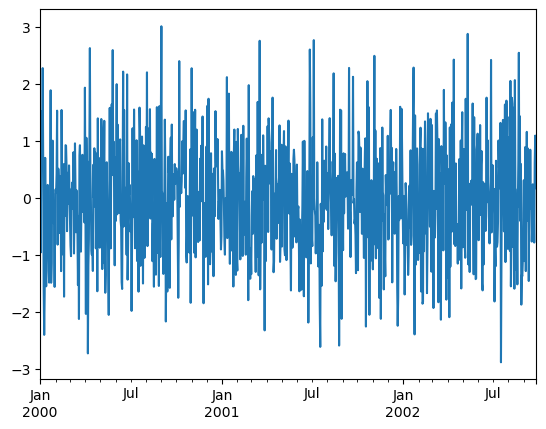

In [157]:
ts.plot()

In [153]:
ts = ts.cumsum()

<Axes: >

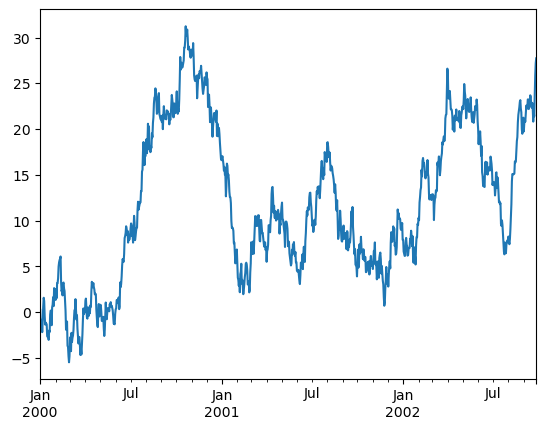

In [154]:
ts.plot()

When using Jupyter, the plot will appear using `plot()`. Otherwise use `matplotlib.pyplot.show` to show it or `matplotlib.pyplot.savefig` to write it to a file.

`plot()` plots all columns

In [159]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-01,-1.742046,0.560584,0.320612,-0.485542
2000-01-02,-0.146873,-0.520073,0.911944,-0.957002
2000-01-03,1.129637,-0.844667,0.623420,1.178137
2000-01-04,1.188878,-0.499244,-0.381286,-0.400838
2000-01-05,-0.678624,-1.702197,1.376239,-0.673291
...,...,...,...,...
2002-09-22,-0.869558,1.691342,0.796594,-1.554582
2002-09-23,-0.157349,0.775313,-0.837868,-1.932677
2002-09-24,1.930610,-0.120252,0.832185,1.286123
2002-09-25,0.901795,0.034603,1.385883,-0.769854


In [160]:
df = df.cumsum()

In [161]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

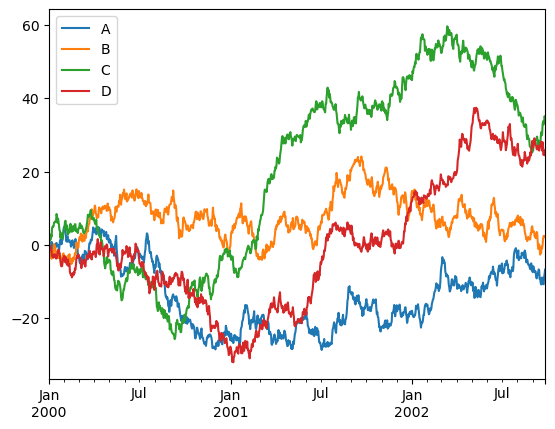

In [165]:
df.plot()
plt.legend(loc='best');

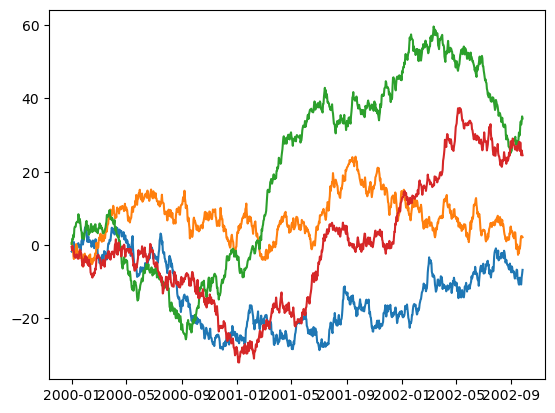

In [167]:
# Plot using matplotib directly to compare
plt.plot(df);

**Importing and Exporting Data**

**CSV**

In [183]:
# Writing to a CSV file using `DataFrame.to_csv()`
df = pd.DataFrame(np.random.randint(0, 5, size=(10, 5)), columns =['A', 'B', 'C', 'D', 'E'])

In [186]:
# Write to csv file
df.to_csv('data/foo.csv', index=False)

In [187]:
# Read from a csv file using `DataFrame.read_csv()
df2 = pd.read_csv('data/foo.csv')
df2

,A,B,C,D,E
0,4,2,0,1,2
1,3,4,2,3,2
2,3,4,4,4,1
3,4,1,0,2,2
4,4,2,4,3,1
5,0,2,3,2,4
6,2,3,0,1,0
7,2,0,2,3,4
8,4,3,2,1,0
9,4,2,2,0,0


**Parquet**

In [188]:
# Writing to a Parquet file using `DataFrame.to_parquet()`
df.to_parquet('data/foo.parquet')

In [190]:
# Read from Parquet file using `DataFrame.read_parquet`
df3 = pd.read_parquet('data/foo.parquet')
df3

,A,B,C,D,E
0,4,2,0,1,2
1,3,4,2,3,2
2,3,4,4,4,1
3,4,1,0,2,2
4,4,2,4,3,1
5,0,2,3,2,4
6,2,3,0,1,0
7,2,0,2,3,4
8,4,3,2,1,0
9,4,2,2,0,0


**Excel**

In [193]:
# Write to excel using 'DataFrame.to_excel()'
df.to_excel('data/foo.xlsx', sheet_name='Sheet1', index=False)

In [194]:
# Read an excel file to DataFrame
pd.read_excel('data/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D,E
0,4,2,0,1,2
1,3,4,2,3,2
2,3,4,4,4,1
3,4,1,0,2,2
4,4,2,4,3,1
5,0,2,3,2,4
6,2,3,0,1,0
7,2,0,2,3,4
8,4,3,2,1,0
9,4,2,2,0,0


### Intro to Data Structures

In [197]:
%ismagic

UsageError: Line magic function `%ismagic` not found.
